# Exercise 1: Sensor Data Exploration

## Objective
Understand the structure of the Human Activity Recognition dataset, explore features, visualize distributions, detect inconsistencies, and normalize data for machine learning.

## Step 1: Import Libraries
We start by importing the Python libraries needed for data handling and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load Dataset
Load the features, activity labels, training, and test data from the dataset folder.

In [8]:
# Features and activity labels
features = pd.read_csv('dataset/features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv('dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=0)

# Training and test data
X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('dataset/test/y_test.txt', header=None)

# Assign feature names with DEDUPLICATION (Crucial Fix)
# The HAR dataset has duplicate column names. We must rename them to avoid errors later.
feature_names = features[1].values
seen = {}
unique_names = []
for name in feature_names:
    if name in seen:
        seen[name] += 1
        unique_names.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 0
        unique_names.append(name)

X_train.columns = unique_names
X_test.columns = unique_names

# Map activity labels for readability
y_train_mapped = y_train[0].map(activity_labels[1])
y_test_mapped = y_test[0].map(activity_labels[1])

C:\Users\mekyy\AppData\Local\Temp\ipykernel_30928\2805424761.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('dataset/features.txt', delim_whitespace=True, header=None)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_30928\2805424761.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=0)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_30928\2805424761.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_30928\2805424761.py:7: FutureWarning: The '

## Step 3: Inspect Dataset
Check dataset dimensions and activity distribution. Understanding your data is the first step before training any model.

In [10]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('\nActivity distribution:')
print(y_train_mapped.value_counts())

X_train shape: (7352, 561)
y_train shape: (7352, 1)

Activity distribution:
0
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


## Step 4: Visualize Feature Distributions
Plotting histograms helps identify outliers, skewness, or unusual patterns in sensor features.

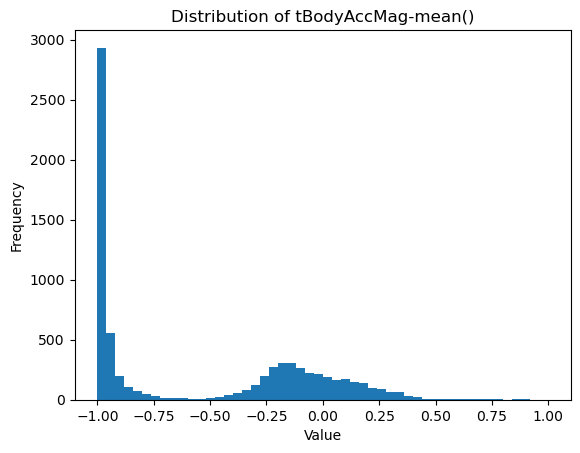

In [12]:
plt.hist(X_train['tBodyAccMag-mean()'], bins=50)
plt.title('Distribution of tBodyAccMag-mean()')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Step 5: Normalize Features
Scaling features is important because many machine learning algorithms are sensitive to the scale of input data. StandardScaler transforms features to have mean 0 and standard deviation 1.

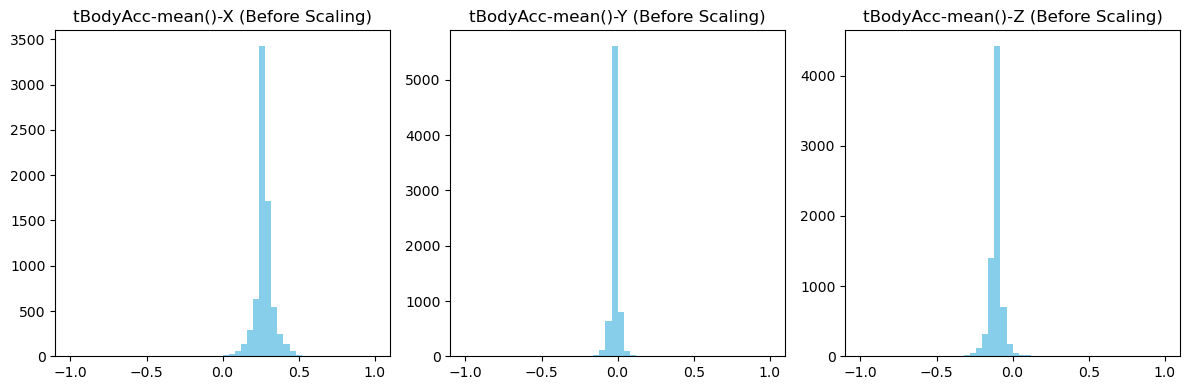

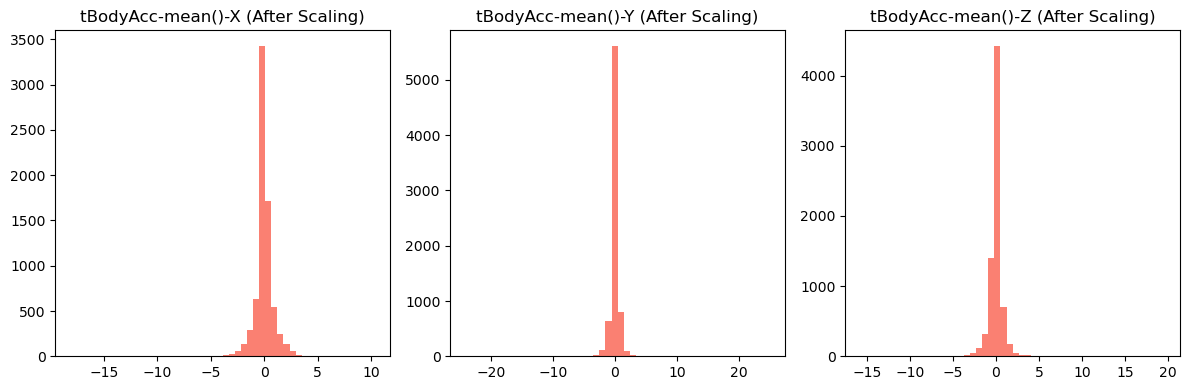

In [16]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select a few sample features to visualize
sample_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Plot before scaling
plt.figure(figsize=(12, 4))
for i, feat in enumerate(sample_features):
    plt.subplot(1, 3, i+1)
    plt.hist(X_train[feat], bins=50, color='skyblue')
    plt.title(f'{feat} (Before Scaling)')
plt.tight_layout()
plt.show()

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot after scaling
plt.figure(figsize=(12, 4))
for i, feat in enumerate(sample_features):
    plt.subplot(1, 3, i+1)
    plt.hist(X_train_scaled_df[feat], bins=50, color='salmon')
    plt.title(f'{feat} (After Scaling)')
plt.tight_layout()
plt.show()


## Step 6: Reflection Questions
1. Why remove the target variable before scaling?
2. Why must the test set use the same scaler as the training set?
3. How does class imbalance affect model training and evaluation?